# K Nearest Neighbors
### Classifying Anonymized Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('Classified Data', index_col = 'Unnamed: 0')

In [9]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In this scenario where distance is an important metric we will scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaled_features = scaler.fit_transform(data.iloc[:,:-1])

In [19]:
scaled_X = pd.DataFrame(scaled_features, columns = data.columns[:-1])

In [21]:
scaled_X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [28]:
Y = data.iloc[:,-1]

First we split the data  
To pick the optimal number of **K** we use the elbow method.

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.3)

In [110]:
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    Y_Pred = knn.predict(X_test)
    error_rate.append(np.mean(Y_Pred != Y_test))

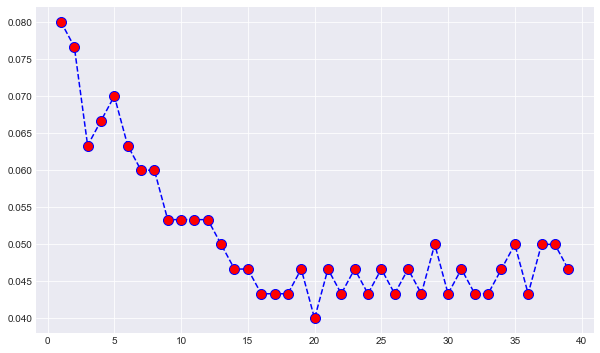

In [111]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
plt.plot(list(range(1,40)),error_rate, linestyle = '--', color = 'blue', marker = 'o', markerfacecolor = 'red',
        markersize = 10)

We can take around **20** to be the **K Value**

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
print(confusion_matrix(Y_test, Y_Pred))

[[143  11]
 [  3 143]]


In [115]:
print(classification_report(Y_test, Y_Pred))

             precision    recall  f1-score   support

          0       0.98      0.93      0.95       154
          1       0.93      0.98      0.95       146

avg / total       0.95      0.95      0.95       300



So we got an accuracy of 95% which is pretty good!